In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelEncoder
import re 
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
# 평가함수
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arm45\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train['text'].nunique(), train['senti'].nunique()

(13414, 2)

In [4]:
train.drop_duplicates(subset=['text'], inplace = True)
train.reindex()

,text,senti
0,J brand is by far the best premium denim line ...,pos
1,I loved this dress. i kept putting it on tryin...,pos
2,I found this at my local store and ended up bu...,pos
3,This picture does not due this sweater justice...,pos
4,"I am 5' 4"", a size 8-10 (size 29/30), and my f...",pos
...,...,...
13413,"These fit quite well, and it's rare that i fin...",pos
13414,I picked this up unexpectedly and whisked it i...,pos
13415,This reminds me of the 1970's. the fabric is s...,pos
13416,"Although i love the soft feel of the sweater, ...",neg


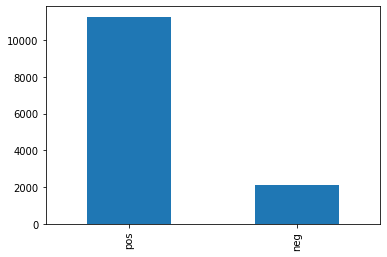

In [5]:
train['senti'].value_counts().plot(kind = 'bar')

In [6]:
def cleaning(word):
    result = []
    for i in range(len(word)):
        w = word[i]
        row = []
        for v in w.split(" "):
            r = re.sub('[^a-zA-Z]','', v) 
            if r != '':
                row.append(r)
        result.append(" ".join(row))
    return result
       

In [7]:
word = train['text'].to_numpy()

result = cleaning(word)
cleaned = pd.DataFrame(result,columns = ['text_cleaned'])

y_train = train['senti']
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_encoded = encoder.transform(y_train)

senti = pd.DataFrame(y_train_encoded, columns = ['senti'])

train_cleaned = pd.concat([cleaned, senti], axis = 1)
train_cleaned

,text_cleaned,senti
0,J brand is by far the best premium denim line ...,1
1,I loved this dress i kept putting it on trying...,1
2,I found this at my local store and ended up bu...,1
3,This picture does not due this sweater justice...,1
4,I am a size size and my figure is appleish i c...,1
...,...,...
13409,These fit quite well and its rare that i find ...,1
13410,I picked this up unexpectedly and whisked it i...,1
13411,This reminds me of the s the fabric is soft an...,1
13412,Although i love the soft feel of the sweater t...,0


In [8]:
train_cleaned.isnull().sum()

text_cleaned    0
senti           0
dtype: int64

In [9]:

word_test = test['text'].to_numpy()
result = cleaning(word_test)
cleaned = pd.DataFrame(result,columns = ['text_cleaned'])

y_test = test['senti']
# pos = 1 neg = 0
encoder = LabelEncoder()

encoder.fit(y_test)
y_test_encoded = encoder.transform(y_test)
senti = pd.DataFrame(y_test_encoded, columns = ['senti'])

test_cleaned = pd.concat([cleaned, senti], axis = 1)
test_cleaned

,text_cleaned,senti
0,Have to disagree with previous posters i found...,1
1,I love everything about this top first its sup...,1
2,This dress has a marilyn feel to it felt like ...,1
3,These cords are great the fit the style everyt...,1
4,This top fit perfectly but too much of my bra ...,0
...,...,...
1486,Im not the type of woman that wears dresses bu...,1
1487,Super soft and cute the buttons add a nice tou...,1
1488,These joggers are super cute and comfortable i...,1
1489,Pilcro denim with embellishment like this alwa...,1


In [10]:
train_cleaned.to_csv('train_cleaned.csv')
test_cleaned.to_csv('test_cleaned.csv')

### tokenize

In [11]:
stopwords = nltk.corpus.stopwords.words('english')

In [12]:
train_cleaned['token'] = train_cleaned['text_cleaned'].apply(lambda x: x.split(' '))
token = train_cleaned['token'].to_numpy()

token_train = []
for t in token:
    cleaned = [w for w in t if w not in stopwords]
    token_train.append(cleaned)
token_train

[['J',
  'brand',
  'far',
  'best',
  'premium',
  'denim',
  'line',
  'retailer',
  'sells',
  'fit',
  'jeans',
  'amazingworth',
  'every',
  'pennyalso',
  'considering',
  'crop',
  'jean',
  'warm',
  'weather',
  'wear',
  'denim',
  'weight',
  'light',
  'thickthe',
  'color',
  'different',
  'ordinary',
  'regular',
  'denim',
  'bluelighter',
  'wash',
  'springsummer'],
 ['I',
  'loved',
  'dress',
  'kept',
  'putting',
  'trying',
  'figure',
  'get',
  'boobs',
  'fall',
  'place',
  'dress',
  'larger',
  'breasts',
  'absolutely',
  'beautiful',
  'otherwise'],
 ['I',
  'found',
  'local',
  'store',
  'ended',
  'buying',
  'colors',
  'fabric',
  'thicker',
  'tshirt',
  'go',
  'many',
  'thingsjeans',
  'dressy',
  'skirts',
  'normally',
  'wear',
  'small',
  'ended',
  'buying',
  'medium',
  'small',
  'fit',
  'little',
  'short',
  'reference',
  'staple',
  'wardrobe',
  'year',
  'round',
  'love'],
 ['This',
  'picture',
  'due',
  'sweater',
  'justice

In [13]:
test_cleaned['token'] = test_cleaned['text_cleaned'].apply(lambda x: x.split(' '))
token = test_cleaned['token'].to_numpy()

token_test = []
for t in token:
    cleaned = [w for w in t if w not in stopwords]
    token_test.append(cleaned)
token_test

[['Have',
  'disagree',
  'previous',
  'posters',
  'found',
  'one',
  'sale',
  'rack',
  'local',
  'retailer',
  'someone',
  'returned',
  'online',
  'adorable',
  'got',
  'many',
  'compliments',
  'dressing',
  'room',
  'area',
  'customers',
  'asked',
  'available',
  'turns',
  'online',
  'exclusive',
  'zipper',
  'recommend',
  'sizing',
  'runs',
  'small',
  'think',
  'pretty',
  'true',
  'size',
  'think',
  'looks',
  'better',
  'bit',
  'loosedrapery',
  'fabric',
  'soft',
  'pretty',
  'tailoring',
  'f'],
 ['I',
  'love',
  'everything',
  'top',
  'first',
  'super',
  'flattering',
  'especially',
  'tummy',
  'small',
  'chested',
  'makes',
  'look',
  'little',
  'chestier',
  'tried',
  'xs',
  'black',
  'really',
  'charcoal',
  'gray',
  'preferred',
  'fit',
  'xs',
  'note',
  'im',
  'lbs',
  'typically',
  'wear',
  'xs',
  'retailer',
  'tops',
  'small',
  'seemed',
  'drapey',
  'armholes',
  'tad',
  'big',
  'store',
  'didnt',
  'wine',
  

### Vectorize

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

D:\Anaconda3\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1)

In [96]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token_train)

In [97]:
threshold = 4 #threshold가 3일때 2보다성능이 낫다
total_cnt = len(tokenizer.word_index) 
rare_cnt = 0 
total_freq = 0 
rare_freq = 0 

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
        print(key)
        
print('number of vocab :',total_cnt)
print('rare vocabs(under %s) number %s:'%(threshold - 1, rare_cnt))
print("percentage of rarevocab:", (rare_cnt / total_cnt)*100)
print("perecentage of rarevocab frequency:", (rare_freq / total_freq)*100)

premium
amazingworth
pennyalso
thickthe
bluelighter
thingsjeans
appleish
rules
tankinifirst
eliminated
awaysecond
flareout
tummies
milder
trus
eagerly
awaited
necklne
ribbons
footlong
stray
manufactured
faulty
jeansnydj
fabricstretches
lighterweight
attracting
envious
rug
thoughtspros
jeweled
topcons
alerations
touchfit
shells
boarder
taupegray
internationally
excursions
risqu
behold
smurf
transferred
ambitious
grandmothers
attic
musical
waterjust
overtime
meended
todaynow
wrinkley
fabrication
overlaps
ahh
absurd
additionits
materialnot
flowiness
imitations
resulting
released
historically
wasit
false
flutters
blackcharcoal
uncommon
wavy
rceived
weathered
merely
chair
coatsizing
framing
measured
pbly
upgraded
lite
weak
memories
skating
wheatleys
pond
primarily
grew
forearm
armsi
warmish
duffs
substancial
tirst
tme
individuals
jacquard
loom
texturally
beigebrown
dressesskirts
lengthen
nouveau
eastern
beadwork
greater
lovers
etros
thousands
aptly
petitei
sling
shownbeautiful
bottomback
kn

rainproof
adj
chandelier
armful
bangles
distract
ugliest
antebellum
nightmare
horrifiedfor
approximately
depictes
michigan
ave
dressyou
perfectlight
stranger
timeworn
effects
handling
spxsp
thered
proba
toss
schoolmarm
browse
err
snugness
fastening
pinky
barneypurple
proved
stiching
unit
cousins
blob
kinds
easel
providing
lust
ms
easiest
presentations
readings
unpack
shake
goi
shortsleeved
bootees
ombre
offweekends
cas
paring
alignment
oversizing
retur
shakes
mermaidish
solve
throu
ada
collect
perkier
costa
rica
kneesagreeing
numericallysized
armsshoulders
assistantstyle
consultant
watched
assumption
stunned
um
colorblock
horizon
redblack
colorsblocking
greenblack
colorwise
lookers
peeked
steamer
cities
span
biweekly
normall
networking
natured
quaiity
ans
overdone
swingyi
donning
bolo
issuei
diminish
valuei
alsonot
tooclassic
edgea
meal
firmness
fleetwood
notsoskinny
fleetwoods
balled
massively
chici
redeeming
htat
timenow
raves
noticing
specious
allot
everywhe
qualityi
focal
war
earri

singly
slanted
claire
underwood
tending
necks
brownlove
todo
undoing
kneecaps
maneuvering
k
tallest
preparing
sushi
cheese
plate
hostess
chime
bodys
impending
fuchsia
accomodate
seasonwear
improvement
lessthanperfect
hamper
dryel
tor
upgrade
failed
shortcropped
shimmy
offso
claimed
billows
brothers
hearty
laika
inca
shoesthe
whiteyellow
shaver
daydreaming
honeymooning
cinque
terre
woke
outsi
grrr
gravity
bottomheavy
skins
necklines
dig
talls
mensware
attachment
corrected
browngold
considerably
cents
northeastern
bleachers
pardon
buttonhole
hol
squeezed
seamlessly
weathers
plentiful
solo
darned
cuthenley
shirtsmock
offbut
themyou
itdefinitely
doublegauze
counting
stuckbadly
gladiator
creambeigeneutral
clincher
excellently
navyish
anothe
figureskimming
hardware
brioche
loft
decreases
angles
flouncy
cuteperfect
polar
bear
cushion
frill
bothersomeit
wearand
perfectweight
locations
mistaking
blousetee
tattooed
misplaced
recover
repurchase
mysteriously
lolanyway
savings
blunt
impress
locally

ol
tickles
tickle
loli
specialit
flowyi
biokleen
sprayed
permanent
sspm
shirring
cardy
justifying
members
coatsjackets
offerings
bay
photographer
settings
bluered
styleits
sumer
shee
farrah
knocking
warmweather
notsogood
az
skipping
positives
object
affords
saywith
displays
tis
elle
woods
overcast
yuck
chiffonlike
bulkystiff
financial
bracket
wave
typeim
mih
jeansthese
jeantype
gettogethers
fairs
fullylined
differen
ador
dylan
mccartney
roger
walters
neil
redpurple
comfortablewhat
mist
newsies
bodythe
skews
remains
boney
shadow
orangeblue
pinkcorallike
rightlove
brightens
saleswomen
mediumtolightweight
throwback
neededsome
shares
jeansknakis
blackbeige
mys
geez
extensively
task
grid
idahoi
patricks
smiling
superbthanks
periwinkleish
mou
tablecloth
picturedi
lapel
symmetrical
hifh
blew
isth
predominantly
weaved
wearability
frontbut
funi
scarfs
ii
nit
slack
strangelyi
uberflattering
brightening
flattered
finicky
syntheticalmost
wonderfulfor
contact
fitim
slides
springtosummer
lackadaisic

smallframed
credit
whirlwind
exchanges
resulted
delicateness
rogers
mb
latigo
touchi
colorslooks
effectclassic
uniqueruns
annual
switzerland
plasticky
rips
forming
lineba
discourage
pre
kota
prettily
orderingreturning
curvehugging
complaintbis
uniquespecial
saledoes
adventurous
wonderfulcozy
film
peeking
racetrack
yr
derrire
washeddried
convertible
linedi
blousesheer
topcant
pieceand
speciallooking
comfortz
topgreat
fabricmakes
mottled
folks
bigboxy
quintessential
impossibly
forewarning
thinki
theyr
modellol
reminder
slinder
lovelyi
peti
offlate
funk
fabricit
toasty
quirk
optionscould
jacketso
goodone
mjuch
huhm
twinsies
minimum
jacketcape
puctures
compete
relieved
slightand
slightdisappointment
cuteasallgetout
samecolor
avantgarde
oversizedits
orders
denimcargo
ladybugs
undamaged
fastfashion
student
enougheverything
betwe
nurse
curvyhips
scoops
flatteringbut
grill
straightfigured
shading
loosley
ceases
amaze
intracately
access
difficu
bubbles
personalityits
sundrys
boohooanyway
summer

sidelovely
unavoidable
continued
glimpse
viewable
disrupts
sizingfit
sans
issuesi
skintoned
begging
romanboho
greige
seahued
cosplay
everythinglooks
wedgewood
upand
pasti
widtheither
keeperit
tback
expectedthe
stitchingseaming
almostfrayed
defini
irregularities
blusha
apre
mcpherson
aflutter
modelso
fiveyearold
pds
exceptioni
midithe
closermy
chuckled
mrs
roper
lightwei
torture
device
lengthens
harmonious
oil
drawing
resolution
collarbonesthe
mislabel
culotte
basketball
hybrid
heavenvery
buildings
tunnels
alittle
waista
mortif
eg
lifts
modelthe
biggermuscular
drastically
checkout
sheeryeah
largeregular
poured
backwaist
wellfitted
darkwash
jeansan
withstanding
straw
suedelike
crimsonbrick
whey
terracotta
pantsskirt
dreamno
puffing
seeit
daylight
bottomi
cracking
crystals
craftsmanshipa
closetordered
currant
addict
sizeneckline
workgot
colorquite
purchae
greenpink
bluemaroon
tapestry
clinged
fifties
stage
mpetite
largemaybe
torsopetite
dawn
cheeky
shouldersneck
pricefyi
jeansshorts
frist

interpret
stretchey
outfitter
malabar
epaulets
peeve
croppedshort
addressed
bf
bailly
shouts
flips
teased
valentine
flaredstraight
desk
disapointed
marvilously
oldstyle
vividly
pining
balloonfit
dwarfed
selected
admiration
tiger
subtlety
lightest
backlike
mullet
thisto
drops
orangy
floorlength
bonnet
candlestick
ebenezer
carol
shmata
yiddish
rags
swe
iso
noce
motifso
barre
absurdly
ruining
creep
fasteners
placei
mushroom
dusterlength
lucy
lui
security
ballgowns
attribute
stratchy
trie
salebought
airyness
xsmal
automatically
reattaching
nimble
thatbuy
cervical
survivor
dealing
health
talked
arrivedlove
retailerthey
prettythe
shadethe
plumpurple
colorthe
colora
skills
perfectlycasual
wireless
announce
nonsense
boost
definitive
beautifulits
disappointedi
saleruns
biti
snatching
seersucker
crimsoncolored
sheerer
visiblethe
looserover
land
rent
runway
seea
hermosa
surf
zuma
seeas
surfingpadd
steaminglaundering
hunch
hemstitch
swell
outweighs
beef
largemost
thickstructured
fitquality
doesntb

thickenesswarm
saleonsale
fabricliner
fin
milan
ak
armsbodice
turquoisenavy
taupepeach
todayit
interpretation
peplm
apartruns
awaiting
shortthe
softcomfortable
minidress
rehemmed
snipped
anywayas
seasonsbordeaux
taught
uppe
lovelybright
customize
boutiques
layi
figurethis
spinning
visibly
toxic
amazedi
petiteexcellent
pointgorgeous
neutralttshighly
slatecan
fabulouslooking
llbs
redwhite
springtimesummer
hightops
highheeled
stretchthis
possi
itany
bitit
waisttiered
goood
latetly
clusters
ahtro
looktried
withoutso
optionsperfect
daysordered
sizea
enlarging
itemand
scuff
ridic
cuteits
flowaside
mn
onelove
plusfor
doubleknot
belief
odering
gulped
pastries
road
electric
petittes
peacoat
fitmight
fitsoft
summerfit
headband
thermostat
waistchallenged
narrowly
righ
poses
yogini
starchchemical
dressesit
aroundholds
teenagers
sharkbite
pause
lenox
geek
ideathis
sepia
fullbaggy
wintry
nipples
accordinglythis
categories
mevery
smallparticularly
chlorine
salt
method
deepdark
getgo
undiesuntil
nyt
c

In [98]:
vocab_size = total_cnt - rare_cnt + 1 # 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4283


In [99]:
# vocab_size 이상의 단어들은 제외해버림
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(token_train)
X_train = tokenizer.texts_to_sequences(token_train)
X_test = tokenizer.texts_to_sequences(token_test)

In [100]:
y_train = train_cleaned['senti'].to_numpy()
y_test = test_cleaned['senti'].to_numpy()

y_train, y_test

(array([1, 1, 1, ..., 1, 0, 1]), array([1, 1, 1, ..., 1, 1, 1]))

### Padding

리뷰의 최대 길이 : 59
리뷰의 평균 길이 : 27.845012673326377


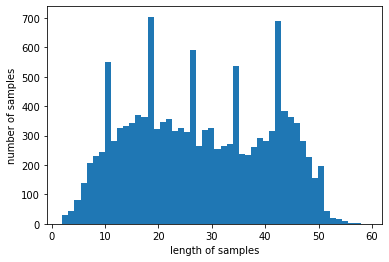

In [101]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [102]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_pad = pad_sequences(X_train)
X_test_pad = pad_sequences(X_test, maxlen = 59)

In [103]:
len(X_train)

13414

## Simple RNN

In [41]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [42]:
def DL_evaluate(test_x,test_y,model):
    predictions = model.predict(test_x)
    predictions = np.round(predictions)
    print(classification_report(test_y, predictions))
    return predictions

In [149]:
from collections import Counter

def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return  {cls: round(float(majority)/float(count), 2) for cls, count in counter.items()}

class_weights = get_class_weights(train_cleaned.senti)
print(class_weights)

{1: 1.0, 0: 5.27}


In [44]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [30]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) 
model.add(SimpleRNN(32)) 
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(X_train_pad, y_train, epochs=15, batch_size=32,class_weight = class_weights,callbacks=[es, mc], validation_split=0.2)

DL_evaluate(X_test_pad, y_test, model)

Train on 10731 samples, validate on 2683 samples
Epoch 1/15
10624/10731 [============================>.] - ETA: 0s - loss: 0.4066 - acc: 0.8311 - f1_m: 0.8877 - precision_m: 0.9504 - recall_m: 0.8447
Epoch 00001: val_acc improved from -inf to 0.92471, saving model to best_model.h5
10731/10731 [==============================] - 5s 442us/sample - loss: 0.4041 - acc: 0.8325 - f1_m: 0.8887 - precision_m: 0.9509 - recall_m: 0.8460 - val_loss: 0.2575 - val_acc: 0.9247 - val_f1_m: 0.9531 - val_precision_m: 0.9714 - val_recall_m: 0.9369
Epoch 2/15
10656/10731 [============================>.] - ETA: 0s - loss: 0.1532 - acc: 0.9469 - f1_m: 0.9670 - precision_m: 0.9886 - recall_m: 0.9477
Epoch 00002: val_acc did not improve from 0.92471
10731/10731 [==============================] - 4s 350us/sample - loss: 0.1531 - acc: 0.9467 - f1_m: 0.9669 - precision_m: 0.9887 - recall_m: 0.9476 - val_loss: 0.2135 - val_acc: 0.9158 - val_f1_m: 0.9470 - val_precision_m: 0.9837 - val_recall_m: 0.9148
Epoch 3/15


array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

## LSTM

In [45]:
from tensorflow.keras.layers import Embedding, Dense, LSTM,Bidirectional,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [32]:
from collections import Counter

def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return  {cls: round(float(majority)/float(count), 2) for cls, count in counter.items()}

class_weights = get_class_weights(train_cleaned.senti)
print(class_weights)

{1: 1.0, 0: 5.27}


In [88]:

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(X_train_pad, y_train, epochs=15, 
                    class_weight = class_weights,callbacks=[es, mc],
                    batch_size=60, validation_split=0.2)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_pad, y_test, verbose=0)

loss, accuracy, f1_score, precision, recall

DL_evaluate(X_test_pad, y_test, model)

Train on 10731 samples, validate on 2683 samples
Epoch 1/15
 1320/10731 [==>...........................] - ETA: 24s - loss: 0.6840 - acc: 0.7947 - f1_m: 0.8713 - precision_m: 0.8781 - recall_m: 0.8821

KeyboardInterrupt: 

In [104]:
# best1
#2번이상 나오지 않은 단어들을 지웠을때의 성능 0.89
#3번이상 나오지 않은 단어들을 지웠을때의 성능 0.89
#4번이상 나오지 않은 단어들을 지웠을때의 성능 0.89
#5번이상 나오지 않은 단어들을 지웠을때의 성능 0.90

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(X_train_pad, y_train, epochs=15, 
                    class_weight = class_weights,callbacks=[es, mc], 
                    batch_size=60, validation_split=0.2)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_pad, y_test, verbose=0)

loss, accuracy, f1_score, precision, recall

DL_evaluate(X_test_pad, y_test, model)

Train on 10731 samples, validate on 2683 samples
Epoch 1/15
10680/10731 [============================>.] - ETA: 0s - loss: 0.3902 - acc: 0.8841 - f1_m: 0.9281 - precision_m: 0.9507 - recall_m: 0.9141
Epoch 00001: val_acc improved from -inf to 0.91390, saving model to best_model.h5
10731/10731 [==============================] - 39s 4ms/sample - loss: 0.3890 - acc: 0.8844 - f1_m: 0.9284 - precision_m: 0.9507 - recall_m: 0.9145 - val_loss: 0.2304 - val_acc: 0.9139 - val_f1_m: 0.9464 - val_precision_m: 0.9826 - val_recall_m: 0.9135
Epoch 2/15
10680/10731 [============================>.] - ETA: 0s - loss: 0.1814 - acc: 0.9405 - f1_m: 0.9634 - precision_m: 0.9865 - recall_m: 0.9425
Epoch 00002: val_acc improved from 0.91390 to 0.94372, saving model to best_model.h5
10731/10731 [==============================] - 38s 4ms/sample - loss: 0.1810 - acc: 0.9408 - f1_m: 0.9636 - precision_m: 0.9866 - recall_m: 0.9428 - val_loss: 0.2030 - val_acc: 0.9437 - val_f1_m: 0.9655 - val_precision_m: 0.9790 -

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [112]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(LSTM(128))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(X_train_pad, y_train, epochs=15, class_weight = class_weights,callbacks=[es, mc], batch_size=60, validation_split=0.2)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_pad, y_test, verbose=0)

loss, accuracy, f1_score, precision, recall

DL_evaluate(X_test_pad, y_test, model)

Train on 10731 samples, validate on 2683 samples
Epoch 1/15
10680/10731 [============================>.] - ETA: 0s - loss: 0.3661 - acc: 0.8682 - f1_m: 0.9089 - precision_m: 0.9560 - recall_m: 0.8788
Epoch 00001: val_acc improved from -inf to 0.92434, saving model to best_model.h5
10731/10731 [==============================] - 73s 7ms/sample - loss: 0.3659 - acc: 0.8685 - f1_m: 0.9092 - precision_m: 0.9561 - recall_m: 0.8792 - val_loss: 0.2156 - val_acc: 0.9243 - val_f1_m: 0.9530 - val_precision_m: 0.9836 - val_recall_m: 0.9250
Epoch 2/15
10680/10731 [============================>.] - ETA: 0s - loss: 0.1465 - acc: 0.9515 - f1_m: 0.9702 - precision_m: 0.9889 - recall_m: 0.9531
Epoch 00002: val_acc improved from 0.92434 to 0.93664, saving model to best_model.h5
10731/10731 [==============================] - 69s 6ms/sample - loss: 0.1460 - acc: 0.9517 - f1_m: 0.9704 - precision_m: 0.9890 - recall_m: 0.9534 - val_loss: 0.2280 - val_acc: 0.9366 - val_f1_m: 0.9615 - val_precision_m: 0.9757 -

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [114]:
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(LSTM(128))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(X_train_pad, y_train, epochs=15, class_weight = class_weights,callbacks=[es, mc], batch_size=60, validation_split=0.2)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_pad, y_test, verbose=0)

loss, accuracy, f1_score, precision, recall

DL_evaluate(X_test_pad, y_test, model)

Train on 10731 samples, validate on 2683 samples
Epoch 1/15
10680/10731 [============================>.] - ETA: 0s - loss: 0.4248 - acc: 0.8248 - f1_m: 0.8663 - precision_m: 0.9520 - recall_m: 0.8237
Epoch 00001: val_acc improved from -inf to 0.91875, saving model to best_model.h5
10731/10731 [==============================] - 46s 4ms/sample - loss: 0.4241 - acc: 0.8255 - f1_m: 0.8669 - precision_m: 0.9520 - recall_m: 0.8247 - val_loss: 0.2274 - val_acc: 0.9187 - val_f1_m: 0.9498 - val_precision_m: 0.9787 - val_recall_m: 0.9231
Epoch 2/15
10680/10731 [============================>.] - ETA: 0s - loss: 0.2044 - acc: 0.9331 - f1_m: 0.9582 - precision_m: 0.9847 - recall_m: 0.9351
Epoch 00002: val_acc improved from 0.91875 to 0.92657, saving model to best_model.h5
10731/10731 [==============================] - 42s 4ms/sample - loss: 0.2039 - acc: 0.9333 - f1_m: 0.9584 - precision_m: 0.9847 - recall_m: 0.9353 - val_loss: 0.1991 - val_acc: 0.9266 - val_f1_m: 0.9544 - val_precision_m: 0.9878 -

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [115]:
model2 = Sequential()
model2.add(Dense(128, activation = 'relu', input_shape= (59,)))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(16, activation = 'relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])


history = model2.fit(X_train_pad, y_train, class_weight = class_weights,epochs=20, batch_size =8, validation_split=0.2)

loss, accuracy, f1_score, precision, recall = model2.evaluate(X_test_pad, y_test, verbose=0)

loss, accuracy, f1_score, precision, recall

DL_evaluate(X_test_pad, y_test, model2)

Train on 10731 samples, validate on 2683 samples
Epoch 1/20
10731/10731 [==============================] - 5s 485us/sample - loss: 6.6620 - acc: 0.8382 - f1_m: 0.9054 - precision_m: 0.8413 - recall_m: 0.9963 - val_loss: 6.7213 - val_acc: 0.8394 - val_f1_m: 0.9070 - val_precision_m: 0.8390 - val_recall_m: 1.0000
Epoch 2/20
10731/10731 [==============================] - 4s 353us/sample - loss: 6.5621 - acc: 0.8409 - f1_m: 0.9076 - precision_m: 0.8410 - recall_m: 1.0000 - val_loss: 6.6432 - val_acc: 0.8394 - val_f1_m: 0.9064 - val_precision_m: 0.8390 - val_recall_m: 1.0000
Epoch 3/20
10731/10731 [==============================] - 4s 352us/sample - loss: 6.6723 - acc: 0.8409 - f1_m: 0.9080 - precision_m: 0.8408 - recall_m: 1.0000 - val_loss: 6.6803 - val_acc: 0.8394 - val_f1_m: 0.9068 - val_precision_m: 0.8397 - val_recall_m: 1.0000
Epoch 4/20
10731/10731 [==============================] - 4s 352us/sample - loss: 6.5859 - acc: 0.8409 - f1_m: 0.9075 - precision_m: 0.8408 - recall_m: 1.0000 

D:\Anaconda3\envs\tf1\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

Train on 10731 samples, validate on 2683 samples
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/15
10731/10731 [==============================] - 14s 1ms/sample - loss: 0.4655 - acc: 0.7752 - f1_m: 0.8374 - precision_m: 0.9311 - recall_m: 0.7868 - val_loss: 0.2598 - val_acc: 0.9191 - val_f1_m: 0.9502 - val_precision_m: 0.9741 - val_recall_m: 0.9283
Epoch 2/15
10731/10731 [==============================] - 11s 1ms/sample - loss: 0.1753 - acc: 0.9400 - f1_m: 0.9630 - precision_m: 0.9878 - recall_m: 0.9403 - val_loss: 0.2645 - val_acc: 0.9366 - val_f1_m: 0.9616 - val_precision_m: 0.9663 - val_recall_m: 0.9576 0.9660 - precision_m: 0.9894 - ETA: 4s - loss: 0.170
Epoch 3/15
10731/10731 [==============================] - 11s 1ms/sample - loss: 0.0960 - acc: 0.9689 - f1_m: 0.9808 - precision_m: 0.9942 - recall_m: 0.9684 - val_loss: 0.3896 - val_acc: 0.9378 - val_f1_m: 0.9632 - val_precision_m: 0.9555 - val_recall_m: 0.9719
Epoch 4/15
10731/10731 [=======

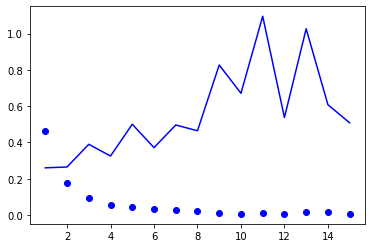

              precision    recall  f1-score   support

           0       0.76      0.84      0.79       231
           1       0.97      0.95      0.96      1260

    accuracy                           0.93      1491
   macro avg       0.86      0.89      0.88      1491
weighted avg       0.94      0.93      0.93      1491



array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [117]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=59))
model.add(Dropout(0.2))
model.add(Conv1D(256,3,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(X_train_pad, y_train, class_weight = class_weights,epochs=15, batch_size=60, validation_split=0.2)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_pad, y_test, verbose=0)

print(loss, accuracy, f1_score, precision, recall)

# Plotting the history
%matplotlib inline

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validatin loss')

plt.show()

# evaluation
DL_evaluate(X_test_pad, y_test, model)

Train on 10731 samples, validate on 2683 samples
Epoch 1/15
10731/10731 [==============================] - 13s 1ms/sample - loss: 0.4464 - acc: 0.7955 - f1_m: 0.8500 - precision_m: 0.9413 - recall_m: 0.8045 - val_loss: 0.2411 - val_acc: 0.9150 - val_f1_m: 0.9473 - val_precision_m: 0.9781 - val_recall_m: 0.9194
Epoch 2/15
10731/10731 [==============================] - 13s 1ms/sample - loss: 0.1987 - acc: 0.9331 - f1_m: 0.9586 - precision_m: 0.9853 - recall_m: 0.9349 - val_loss: 0.2170 - val_acc: 0.9143 - val_f1_m: 0.9464 - val_precision_m: 0.9840 - val_recall_m: 0.9126
Epoch 3/15
10731/10731 [==============================] - 12s 1ms/sample - loss: 0.1410 - acc: 0.9492 - f1_m: 0.9685 - precision_m: 0.9900 - recall_m: 0.9491 - val_loss: 0.2353 - val_acc: 0.9199 - val_f1_m: 0.9505 - val_precision_m: 0.9801 - val_recall_m: 0.9231
Epoch 4/15
10731/10731 [==============================] - 12s 1ms/sample - loss: 0.1114 - acc: 0.9624 - f1_m: 0.9770 - precision_m: 0.9937 - recall_m: 0.9617 - va

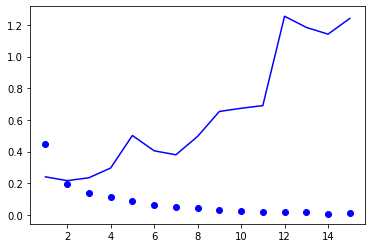

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       231
           1       0.96      0.97      0.96      1260

    accuracy                           0.94      1491
   macro avg       0.89      0.86      0.87      1491
weighted avg       0.93      0.94      0.93      1491



array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [118]:
# best 2
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=59))
model.add(Dropout(0.2))
model.add(Conv1D(256,3,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(X_train_pad, y_train, class_weight = class_weights,epochs=15, batch_size=60, validation_split=0.2)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_pad, y_test, verbose=0)

print(loss, accuracy, f1_score, precision, recall)

# Plotting the history
%matplotlib inline

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validatin loss')

plt.show()

# evaluation
DL_evaluate(X_test_pad, y_test, model)

In [119]:
# asemble the layers
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=59))
model.add(Dropout(0.6))
model.add(Conv1D(128,3,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0,4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0,4))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(X_train_pad, y_train, class_weight = class_weights,epochs=15, batch_size=60, validation_split=0.2)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_pad, y_test, verbose=0)

DL_evaluate(X_test_pad, y_test, model)

Train on 10731 samples, validate on 2683 samples
Epoch 1/15
10731/10731 [==============================] - 9s 829us/sample - loss: 0.6940 - acc: 0.5965 - f1_m: 0.6918 - precision_m: 0.8232 - recall_m: 0.6429 - val_loss: 0.6923 - val_acc: 0.1774 - val_f1_m: 0.0411 - val_precision_m: 0.6556 - val_recall_m: 0.0214
Epoch 2/15
10731/10731 [==============================] - 7s 679us/sample - loss: 0.6417 - acc: 0.5516 - f1_m: 0.6194 - precision_m: 0.8962 - recall_m: 0.5170 - val_loss: 0.4780 - val_acc: 0.9113 - val_f1_m: 0.9486 - val_precision_m: 0.9176 - val_recall_m: 0.9826
Epoch 3/15
10731/10731 [==============================] - 7s 683us/sample - loss: 0.2981 - acc: 0.8940 - f1_m: 0.9332 - precision_m: 0.9752 - recall_m: 0.8968 - val_loss: 0.3060 - val_acc: 0.9296 - val_f1_m: 0.9575 - val_precision_m: 0.9585 - val_recall_m: 0.9572
Epoch 4/15
10731/10731 [==============================] - 9s 854us/sample - loss: 0.1954 - acc: 0.9328 - f1_m: 0.9584 - precision_m: 0.9886 - recall_m: 0.9308 

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [120]:
# asemble the layers
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=59))
model.add(Dropout(0.6))
model.add(Conv1D(128,3,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0,4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0,4))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(X_train_pad, y_train, class_weight = class_weights,epochs=15, batch_size=60, validation_split=0.2)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_pad, y_test, verbose=0)

DL_evaluate(X_test_pad, y_test, model)

Train on 10731 samples, validate on 2683 samples
Epoch 1/15
10731/10731 [==============================] - 9s 808us/sample - loss: 0.6924 - acc: 0.6956 - f1_m: 0.7946 - precision_m: 0.8450 - recall_m: 0.7839 - val_loss: 0.6742 - val_acc: 0.8449 - val_f1_m: 0.9056 - val_precision_m: 0.9186 - val_recall_m: 0.8947
Epoch 2/15
10731/10731 [==============================] - 7s 634us/sample - loss: 0.5374 - acc: 0.8186 - f1_m: 0.8859 - precision_m: 0.9295 - recall_m: 0.8528 - val_loss: 0.3552 - val_acc: 0.8312 - val_f1_m: 0.8898 - val_precision_m: 0.9799 - val_recall_m: 0.8166
Epoch 3/15
10731/10731 [==============================] - 7s 637us/sample - loss: 0.2997 - acc: 0.8958 - f1_m: 0.9349 - precision_m: 0.9726 - recall_m: 0.9018 - val_loss: 0.2601 - val_acc: 0.9284 - val_f1_m: 0.9566 - val_precision_m: 0.9654 - val_recall_m: 0.9486
Epoch 4/15
10731/10731 [==============================] - 9s 810us/sample - loss: 0.2346 - acc: 0.9242 - f1_m: 0.9533 - precision_m: 0.9796 - recall_m: 0.9295 

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

### Best Model Hype Tuning

In [33]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional,Dropout
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [108]:
# best1
model = Sequential()
model.add(Embedding(vocab_size, 256))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(X_train_pad, y_train, epochs=15, class_weight = class_weights,callbacks=[es, mc], batch_size=128, validation_split=0.2)

LSTM_best_result = DL_evaluate(X_test_pad, y_test, model)

Train on 10731 samples, validate on 2683 samples
Epoch 1/15
10624/10731 [============================>.] - ETA: 0s - loss: 0.3738 - acc: 0.8573 - f1_m: 0.9075 - precision_m: 0.9646 - recall_m: 0.8644
Epoch 00001: val_acc improved from -inf to 0.93589, saving model to best_model.h5
10731/10731 [==============================] - 61s 6ms/sample - loss: 0.3719 - acc: 0.8583 - f1_m: 0.9083 - precision_m: 0.9651 - recall_m: 0.8653 - val_loss: 0.2434 - val_acc: 0.9359 - val_f1_m: 0.9611 - val_precision_m: 0.9716 - val_recall_m: 0.9510
Epoch 2/15
10624/10731 [============================>.] - ETA: 0s - loss: 0.1772 - acc: 0.9392 - f1_m: 0.9627 - precision_m: 0.9865 - recall_m: 0.9408
Epoch 00002: val_acc improved from 0.93589 to 0.94447, saving model to best_model.h5
10731/10731 [==============================] - 58s 5ms/sample - loss: 0.1769 - acc: 0.9391 - f1_m: 0.9626 - precision_m: 0.9865 - recall_m: 0.9405 - val_loss: 0.2113 - val_acc: 0.9445 - val_f1_m: 0.9665 - val_precision_m: 0.9774 -

In [106]:
# best1
model = Sequential()
model.add(Embedding(vocab_size, 59))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(X_train_pad, y_train, epochs=15, class_weight = class_weights,callbacks=[es, mc], batch_size=256, validation_split=0.2)

LSTM_best_result2 = DL_evaluate(X_test_pad, y_test, model)

Train on 10731 samples, validate on 2683 samples
Epoch 1/15
10496/10731 [============================>.] - ETA: 0s - loss: 0.5649 - acc: 0.7470 - f1_m: 0.7888 - precision_m: 0.8759 - recall_m: 0.7504
Epoch 00001: val_acc improved from -inf to 0.84830, saving model to best_model.h5
10731/10731 [==============================] - 24s 2ms/sample - loss: 0.5590 - acc: 0.7508 - f1_m: 0.7927 - precision_m: 0.8787 - recall_m: 0.7543 - val_loss: 0.3270 - val_acc: 0.8483 - val_f1_m: 0.9025 - val_precision_m: 0.9768 - val_recall_m: 0.8388
Epoch 2/15
10496/10731 [============================>.] - ETA: 0s - loss: 0.2578 - acc: 0.9098 - f1_m: 0.9433 - precision_m: 0.9821 - recall_m: 0.9097
Epoch 00002: val_acc improved from 0.84830 to 0.92695, saving model to best_model.h5
10731/10731 [==============================] - 21s 2ms/sample - loss: 0.2558 - acc: 0.9105 - f1_m: 0.9438 - precision_m: 0.9823 - recall_m: 0.9106 - val_loss: 0.2465 - val_acc: 0.9269 - val_f1_m: 0.9554 - val_precision_m: 0.9714 -

In [37]:
# best1
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(X_train_pad, y_train, epochs=15, class_weight = class_weights,callbacks=[es, mc], batch_size=128, validation_split=0.2)

LSTM_result3 = DL_evaluate(X_test_pad, y_test, model)

Train on 10731 samples, validate on 2683 samples
Epoch 1/15
10624/10731 [============================>.] - ETA: 0s - loss: 0.4367 - acc: 0.8660 - f1_m: 0.9092 - precision_m: 0.9529 - recall_m: 0.8873
Epoch 00001: val_acc did not improve from 0.94819
10731/10731 [==============================] - 19s 2ms/sample - loss: 0.4342 - acc: 0.8667 - f1_m: 0.9098 - precision_m: 0.9532 - recall_m: 0.8881 - val_loss: 0.2223 - val_acc: 0.9068 - val_f1_m: 0.9417 - val_precision_m: 0.9849 - val_recall_m: 0.9025
Epoch 2/15
10624/10731 [============================>.] - ETA: 0s - loss: 0.1853 - acc: 0.9369 - f1_m: 0.9607 - precision_m: 0.9859 - recall_m: 0.9390
Epoch 00002: val_acc did not improve from 0.94819
10731/10731 [==============================] - 18s 2ms/sample - loss: 0.1851 - acc: 0.9371 - f1_m: 0.9609 - precision_m: 0.9859 - recall_m: 0.9392 - val_loss: 0.2116 - val_acc: 0.9187 - val_f1_m: 0.9496 - val_precision_m: 0.9832 - val_recall_m: 0.9184
Epoch 3/15
10624/10731 [=====================

In [121]:
# best 2

model = Sequential()
model.add(Embedding(vocab_size, 256, input_length=59))
model.add(Dropout(0.2))
model.add(Conv1D(128,3,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
history = model.fit(X_train_pad, y_train, class_weight = class_weights,epochs=15, batch_size=128, validation_split=0.2)

# evaluation
CNN_result = DL_evaluate(X_test_pad, y_test, model)

Train on 10731 samples, validate on 2683 samples
Epoch 1/15
10731/10731 [==============================] - 10s 965us/sample - loss: 0.4620 - acc: 0.8041 - f1_m: 0.8650 - precision_m: 0.9387 - recall_m: 0.8214 - val_loss: 0.2543 - val_acc: 0.8807 - val_f1_m: 0.9242 - val_precision_m: 0.9846 - val_recall_m: 0.8716
Epoch 2/15
10731/10731 [==============================] - 9s 816us/sample - loss: 0.1859 - acc: 0.9381 - f1_m: 0.9618 - precision_m: 0.9864 - recall_m: 0.9396 - val_loss: 0.2160 - val_acc: 0.9273 - val_f1_m: 0.9553 - val_precision_m: 0.9798 - val_recall_m: 0.9323
Epoch 3/15
10731/10731 [==============================] - 9s 827us/sample - loss: 0.1066 - acc: 0.9668 - f1_m: 0.9798 - precision_m: 0.9937 - recall_m: 0.9669 - val_loss: 0.2818 - val_acc: 0.9400 - val_f1_m: 0.9640 - val_precision_m: 0.9695 - val_recall_m: 0.9588
Epoch 4/15
10731/10731 [==============================] - 10s 954us/sample - loss: 0.0666 - acc: 0.9815 - f1_m: 0.9888 - precision_m: 0.9962 - recall_m: 0.981

### ElMo

In [232]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import backend as K
import urllib.request


In [233]:
elmo = hub.Module("https://tfhub.dev/google/elmo/1", trainable=True)
# 텐서플로우 허브로부터 ELMo를 다운로드

sess = tf.Session()
K.set_session(sess)
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

In [234]:
train = pd.read_csv('train_cleaned.csv',usecols=[1,2])
test = pd.read_csv('test_cleaned.csv',usecols=[1,2])

In [235]:
train.drop_duplicates(subset=['text_cleaned'], inplace = True)

In [236]:
X_train = list(train['text_cleaned'])
y_train = list(train['senti'])

In [237]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [238]:
len(y_train), len(X_train)

(13414, 13414)

In [239]:
def ELMoEmbedding(x):
    return elmo(tf.squeeze(tf.cast(x, tf.string)), as_dict=True, signature="default")["default"]

In [240]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Lambda, Input


input_text = Input(shape=(1,), dtype=tf.string)
embedding_layer = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
hidden_layer = Dense(256, activation='relu')(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)
elmo = Model(inputs=[input_text], outputs=output_layer)
elmo.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [241]:
history = elmo.fit(X_train, y_train, epochs=5, batch_size=256, validation_split = 0.2)

Train on 10731 samples, validate on 2683 samples
Epoch 1/5
10731/10731 [==============================] - 3814s 355ms/sample - loss: 0.3395 - acc: 0.8639 - val_loss: 0.2430 - val_acc: 0.8938
Epoch 2/5
10731/10731 [==============================] - 3697s 345ms/sample - loss: 0.2463 - acc: 0.9004 - val_loss: 0.2320 - val_acc: 0.9132
Epoch 3/5
10731/10731 [==============================] - 3764s 351ms/sample - loss: 0.2193 - acc: 0.9118 - val_loss: 0.2788 - val_acc: 0.8837
Epoch 4/5
10731/10731 [==============================] - 3690s 344ms/sample - loss: 0.2044 - acc: 0.9148 - val_loss: 0.1907 - val_acc: 0.9322
Epoch 5/5
10731/10731 [==============================] - 3689s 344ms/sample - loss: 0.1996 - acc: 0.9173 - val_loss: 0.1799 - val_acc: 0.9329


In [242]:
X_test = list(test_cleaned['text_cleaned'])
y_test = list(test_cleaned['senti'])

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [243]:
elmo_result = DL_evaluate(X_test, y_test, elmo)

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       231
           1       0.96      0.96      0.96      1260

    accuracy                           0.93      1491
   macro avg       0.87      0.86      0.86      1491
weighted avg       0.93      0.93      0.93      1491



In [ ]:
del model

### TF IDF -- ML

In [122]:
# 평가함수

def evaluate(test_x,test_y,model):
    predictions = model.predict(test_x)
    print(classification_report(test_y, predictions))
    return predictions

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [124]:
train_cleaned = pd.read_csv('train_cleaned.csv',usecols = [1,2])
test_cleaned = pd.read_csv('test_cleaned.csv',usecols = [1,2])

In [125]:
x_train = train_cleaned['text_cleaned'].tolist()
y_train = train_cleaned['senti'].to_numpy()

x_test = test_cleaned['text_cleaned'].tolist()
y_test = test_cleaned['senti'].to_numpy()
vectorizer = TfidfVectorizer(stop_words='english',
                             min_df = 5,
                             sublinear_tf = True,
                             ngram_range=(1,2))

# vectorizer = TfidfVectorizer(stop_words='english', min_df = 4,sublinear_tf = True,ngram_range=(1,2))
x_train_vector = vectorizer.fit_transform(x_train)
x_test_vector = vectorizer.transform(x_test)


In [126]:
x_train = train_cleaned['text_cleaned'].tolist()
y_train = train_cleaned['senti'].to_numpy()

x_test = test_cleaned['text_cleaned'].tolist()
y_test = test_cleaned['senti'].to_numpy()
vectorizer2 = TfidfVectorizer(stop_words='english',
                             min_df = 4,
                             sublinear_tf = True,
                             ngram_range=(1,3))

# vectorizer = TfidfVectorizer(stop_words='english', min_df = 4,sublinear_tf = True,ngram_range=(1,2))
x_train_vector2 = vectorizer2.fit_transform(x_train)
x_test_vector2 = vectorizer2.transform(x_test)


In [127]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(y_train),
                                             y_train))

w_array = np.ones(y_train.shape[0], dtype = 'float')
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val-1]

w_array

array([3.13704397, 3.13704397, 3.13704397, ..., 3.13704397, 0.59480312,
       3.13704397])

## NB

In [169]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha = 0.05, fit_prior=False)
nb.fit(x_train_vector, y_train)
pred = nb.predict(x_test_vector)

In [170]:
NB_result = evaluate(x_test_vector,y_test,nb)

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       231
           1       0.98      0.94      0.96      1260

    accuracy                           0.93      1491
   macro avg       0.86      0.93      0.89      1491
weighted avg       0.94      0.93      0.94      1491



In [133]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7,
                           weights = 'uniform',
                           algorithm ='auto')
knn.fit(x_train_vector, y_train)

knn_result = evaluate(x_test_vector,y_test,knn)

              precision    recall  f1-score   support

           0       0.82      0.50      0.62       231
           1       0.91      0.98      0.95      1260

    accuracy                           0.91      1491
   macro avg       0.87      0.74      0.78      1491
weighted avg       0.90      0.91      0.90      1491



In [134]:
knn = KNeighborsClassifier(n_neighbors = 7,
                           weights = 'uniform',
                           algorithm ='auto')
knn.fit(x_train_vector2, y_train)

knn_result = evaluate(x_test_vector2,y_test,knn)

              precision    recall  f1-score   support

           0       0.79      0.46      0.58       231
           1       0.91      0.98      0.94      1260

    accuracy                           0.90      1491
   macro avg       0.85      0.72      0.76      1491
weighted avg       0.89      0.90      0.89      1491



In [135]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier, plot_importance

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import xgboost as xgb

#### Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(train_cleaned, test_size = 0.2)

y_train = train['senti'].to_numpy()
x_train = train['text_cleaned'].tolist()

y_val = validation['senti'].to_numpy()
x_val = validation['text_cleaned'].tolist()

vectorizer = TfidfVectorizer(stop_words='english', min_df = 4,sublinear_tf = True,ngram_range=(1,2))
x_train = vectorizer.fit_transform(x_train)
x_val = vectorizer.transform(x_val)

In [ ]:
eval_set = [(x_val, y_val)]

In [ ]:
params = {'learning_rate' : 0.05,
          'num_iteration' : 1000,          
          'objective' : 'binary',
          'metric' : 'binary',
          'boosting' : 'dart',
          'scale_pos_weight' : 1.5,
         'seed' : 123}


## LGBM

In [137]:
lgbmclf = LGBMClassifier(leaning_rate = 0.1,
                         num_iteration = 1000,
                        boosting = 'goss',
                         objective = 'binary',
                        max_depth = 16,
                        scale_pos_weight = 10,
                        randomseed = 123)
lgbmclf.fit(x_train_vector, y_train)
lgbm_result = evaluate(x_test_vector,y_test,lgbmclf)

D:\Anaconda3\envs\tf1\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.90      0.67      0.77       231
           1       0.94      0.99      0.96      1260

    accuracy                           0.94      1491
   macro avg       0.92      0.83      0.86      1491
weighted avg       0.94      0.94      0.93      1491



In [171]:
lgbmclf = LGBMClassifier(leaning_rate = 0.1,
                         num_iteration = 1000,
                        boosting = 'goss',
                         objective = 'binary',
                        max_depth = 16,
                        scale_pos_weight = 10,
                        randomseed = 123)
lgbmclf.fit(x_train_vector2, y_train)
lgbm_result2 = evaluate(x_test_vector2,y_test,lgbmclf)

D:\Anaconda3\envs\tf1\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.88      0.70      0.78       231
           1       0.95      0.98      0.96      1260

    accuracy                           0.94      1491
   macro avg       0.91      0.84      0.87      1491
weighted avg       0.94      0.94      0.94      1491



## XGB

In [172]:
xgb = XGBClassifier(leaning_rate = 0.1,
                         num_iteration = 1000,
                        boosting = 'gbtree',
                        max_depth = 32,
                        scale_pos_weight = 10,
                   randomseed = 123)
xgb.fit(x_train_vector, y_train, sample_weight = w_array)
evaluate(x_test_vector,y_test,xgb)

              precision    recall  f1-score   support

           0       0.88      0.52      0.65       231
           1       0.92      0.99      0.95      1260

    accuracy                           0.91      1491
   macro avg       0.90      0.75      0.80      1491
weighted avg       0.91      0.91      0.90      1491



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## SGD

In [142]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss = 'hinge')
sgd.fit(x_train_vector, y_train)
sgd_result = evaluate(x_test_vector, y_test, sgd)

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       231
           1       0.95      0.99      0.97      1260

    accuracy                           0.95      1491
   macro avg       0.93      0.86      0.89      1491
weighted avg       0.95      0.95      0.95      1491



In [143]:
from sklearn.linear_model import SGDClassifier

sgd2 = SGDClassifier(loss='hinge')
sgd2.fit(x_train_vector2, y_train)
sgd_result2 =evaluate(x_test_vector2, y_test, sgd2)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       231
           1       0.95      0.99      0.97      1260

    accuracy                           0.95      1491
   macro avg       0.93      0.85      0.88      1491
weighted avg       0.94      0.95      0.94      1491



## SVC

In [144]:
from sklearn.svm import SVC

In [145]:
svc = SVC(kernel = 'sigmoid', C= 1.0, random_state=0)
svc.fit(x_train_vector, y_train)
evaluate(x_test_vector, y_test, svc)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       231
           1       0.95      0.99      0.97      1260

    accuracy                           0.95      1491
   macro avg       0.93      0.86      0.89      1491
weighted avg       0.95      0.95      0.95      1491



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [258]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(x_train_vector, y_train, 5)

{'C': 10, 'gamma': 0.1}

In [259]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    degrees = [0, 1, 2, 3, 4, 5, 6]
    param_grid = {'C': Cs, 'degree' : degrees}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(x_train_vector, y_train, 5)

{'C': 1, 'degree': 0}

In [261]:
svc_linear = SVC(kernel = 'linear', C= 1, degree = 0, random_state=0)
svc_linear.fit(x_train_vector, y_train)
svc_linear_result= evaluate(x_test_vector, y_test, svc_linear)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       231
           1       0.96      0.98      0.97      1260

    accuracy                           0.95      1491
   macro avg       0.93      0.87      0.89      1491
weighted avg       0.95      0.95      0.95      1491



In [178]:
#svc best

svc = SVC(kernel = 'rbf', C= 10.0, gamma = 0.1, random_state=0)
svc.fit(x_train_vector, y_train)
svc_result= evaluate(x_test_vector, y_test, svc)

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       231
           1       0.96      0.98      0.97      1260

    accuracy                           0.95      1491
   macro avg       0.93      0.88      0.90      1491
weighted avg       0.95      0.95      0.95      1491



In [173]:
#svc best

svc2 = SVC(kernel = 'rbf', C= 10.0, gamma = 0.1, random_state=0)
svc2.fit(x_train_vector2, y_train)
svc_result2= evaluate(x_test_vector2, y_test, svc2)

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       231
           1       0.96      0.98      0.97      1260

    accuracy                           0.95      1491
   macro avg       0.93      0.88      0.90      1491
weighted avg       0.95      0.95      0.95      1491



In [146]:
from sklearn.svm import LinearSVC, SVC

In [150]:
svc = SVC(kernel = 'rbf', C= 10.0, gamma = 0.1, random_state=0, class_weight =class_weights)
svc.fit(x_train_vector, y_train)
evaluate(x_test_vector, y_test, svc)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       231
           1       0.96      0.98      0.97      1260

    accuracy                           0.95      1491
   macro avg       0.91      0.88      0.90      1491
weighted avg       0.95      0.95      0.95      1491



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [148]:
svc = SVC(kernel = 'sigmoid', random_state=0)
svc.fit(x_train_vector, y_train)
evaluate(x_test_vector, y_test, svc)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       231
           1       0.95      0.99      0.97      1260

    accuracy                           0.95      1491
   macro avg       0.93      0.86      0.89      1491
weighted avg       0.95      0.95      0.95      1491



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [151]:
svc = LinearSVC(verbose = 2, C= 10.0, random_state=0, class_weight =class_weights)
svc.fit(x_train_vector, y_train)
evaluate(x_test_vector, y_test, svc)

[LibLinear]              precision    recall  f1-score   support

           0       0.82      0.77      0.79       231
           1       0.96      0.97      0.96      1260

    accuracy                           0.94      1491
   macro avg       0.89      0.87      0.88      1491
weighted avg       0.94      0.94      0.94      1491



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [155]:
# lgbm_result, #0.87
sgd_result, #0.89
svc_result2, #0.90
NB_result #0.88

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [156]:
LSTM_best_result2, #0.89
CNN_result #0.89

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

# Ensemble

In [244]:
# LSTM_best_result2 = np.squeeze(LSTM_best_result2).astype(int)
CNN_result = np.squeeze(CNN_result).astype(int)
LSTM_best_result2 = np.squeeze(LSTM_best_result2).astype(int)
elmo_rsult = np.squeeze(elmo_result).astype(int)


In [245]:
[lgbm_result, sgd_result, svc_result2, NB_result, LSTM_best_result2, CNN_result]

[array([1, 1, 0, ..., 1, 1, 1], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 1, 1], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1])]

In [246]:
temp = lgbm_result + sgd_result + svc_result2 + NB_result + LSTM_best_result2 + CNN_result

In [247]:
ensemble_result = np.round(temp/6).astype(int)

print(classification_report(y_test, ensemble_result))


              precision    recall  f1-score   support

           0       0.91      0.82      0.86       231
           1       0.97      0.98      0.98      1260

    accuracy                           0.96      1491
   macro avg       0.94      0.90      0.92      1491
weighted avg       0.96      0.96      0.96      1491



In [254]:
results = [lgbm_result, sgd_result, svc_result2, NB_result, LSTM_best_result2, CNN_result, elmo_result]
temp = sgd_result + svc_result2 + NB_result + LSTM_best_result2 + CNN_result + elmo_rsult
ensemble_result2 = np.round(temp/6).astype(int)
print(classification_report(y_test, ensemble_result2))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       231
           1       0.97      0.98      0.98      1260

    accuracy                           0.96      1491
   macro avg       0.93      0.91      0.92      1491
weighted avg       0.96      0.96      0.96      1491



In [257]:
temp =  LSTM_best_result2 + CNN_result + elmo_rsult
ensemble_result2 = np.round(temp/3).astype(int)
print(classification_report(y_test, ensemble_result2))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       231
           1       0.96      0.99      0.97      1260

    accuracy                           0.96      1491
   macro avg       0.94      0.89      0.91      1491
weighted avg       0.95      0.96      0.95      1491



In [174]:
from sklearn.ensemble import VotingClassifier

vo_clf = VotingClassifier(estimators =[('SGD', sgd2),
                                       ('SVC', svc2),
                                       ('NB',nb),
                                       ('LGBM',lgbmclf),
                                      ('XGB',xgb)])

In [176]:
vo_clf.fit(x_train_vector, y_train)
evaluate(x_test_vector, y_test, vo_clf)

D:\Anaconda3\envs\tf1\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.93      0.75      0.83       231
           1       0.96      0.99      0.97      1260

    accuracy                           0.95      1491
   macro avg       0.94      0.87      0.90      1491
weighted avg       0.95      0.95      0.95      1491



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [177]:
vo_clf.fit(x_train_vector2, y_train)
evaluate(x_test_vector2, y_test, vo_clf)

D:\Anaconda3\envs\tf1\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


              precision    recall  f1-score   support

           0       0.91      0.75      0.82       231
           1       0.96      0.99      0.97      1260

    accuracy                           0.95      1491
   macro avg       0.93      0.87      0.90      1491
weighted avg       0.95      0.95      0.95      1491



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)